<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 2
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 27th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98101074
Name = 'Mohammad Javad'
Last_Name = 'Hezareh'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Aban 27th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 7th 23:59:59.

In [28]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30 Points + 5 Extra Points)

<font size=4>
Author: Reza Amini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Libraries

In [2]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

<div>
	<font size=3>
        <hr/>
            In this part of the question, we want to implement the functions and draw diagrams and discuss about the convexity of functions
           <hr/>
    </font>
</div>

## Functions

a)
$f_1(x) = \frac{x^2 cos(\frac{x}{10}) - x}{100} \quad $ where $\quad x \in [80, 110]$
<br/>
b)
$f_2(x) = \log (\sqrt{sin \frac{x}{20}}) \quad $ where $\quad x \in [1, 60]$
<br/>
c)
$f_3(x) = \log (\cos(x) + \frac{45}{x}) \quad $ where $\quad x \in [1, 45]$

<div>
    <font size=3>
In the first step, implement the functions.
     </font>
</div>

In [3]:
def f_1(x):
    ############################################################
    # (0.5 Points)                                             #
    ############################################################
    if x < 80 or x > 110:
        return None
    return (x**2 * np.cos(x/10) - x) / 100

In [4]:
def f_2(x):
    ############################################################
    # (0.5 Points)                                             #
    ############################################################
    if x < 1 or x > 60:
        return None
    return np.log(np.sqrt(np.sin(x/20)))

In [5]:
def f_3(x):
    ############################################################
    # (0.5 Points)                                             #
    ############################################################
    if x < 1 or x > 45:
        return None
    return np.log(np.cos(x) + 45/x)

<div>
    <font size=3>
    Now implement a function to plot the mathematical functions
     </font>
</div>

In [6]:
def draw(func, x_range):
    ############################################################
    # (0.5 Points)                                             #
    ############################################################
    values = list(map(lambda x: func(x), x_range))
    plt.plot(x_range, values)

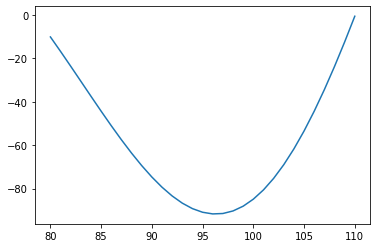

In [7]:
draw(f_1, np.arange(80, 110 + 1))

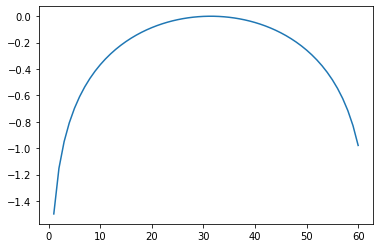

In [8]:
draw(f_2, np.arange(1, 60 + 1))

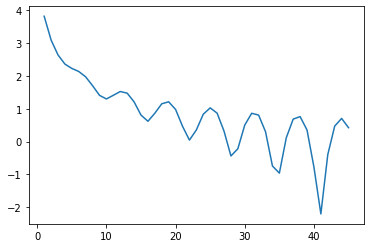

In [9]:
draw(f_3, np.arange(1, 45 + 1))

<div>
    <font size=3>
    Discuss the Convexity of each function according to the diagrams
     </font>
</div>

<font color=blue>
    (5 Points) <br/>
    As its clear, f_1 is convex cause if we get x and y inside it's domain, then the value of this function in any point between x and y will be below than line connecting f_1(x) and f_2(y). Obviously f_2 and f_3 are not convex!
</font>

<div>
    <font size=3>
what method do you suggest to find the maximum in the second function?
     </font>
</div>

<font color=blue>
    (3 Points) <br/>
Gradient descent will be usefull. But consider that we should use following formula to updat x: $x^{t+1} = x^t + \eta \nabla f$ where $\eta$ is a positive small enough number such that algorithm converge.
</font>

<div>
    <font size=3>
        <hr/>
        <ul>
            In this part, we want to obtain a minimum of one of the above functions with the gradiant descent algorithm
        </ul>  
        <hr/>
    </font>
</div>

## Gradiant descent

<div>
    <font size=3>
    Complete gradiant descent function and calculate the minimum of function (a).
     </font>
</div>

In [10]:
def gradiant_descent(func, initial_point: float, learning_rate: float, max_iterations: int):
    ############################################################
    # (7 Points)                                              #
    ############################################################
    h = 0.00001
    x = initial_point
    for _ in range(max_iterations):
        derivative = (func(x+h)-func(x))/h
        if derivative == 0:
            break
        x -= learning_rate * derivative
    
    return x

In [11]:
gradiant_descent(
    func=f_1, 
    initial_point=np.random.uniform(80, 110), 
    learning_rate=0.05, 
    max_iterations=1000
)

96.30594122697187

<div>
    <font size=3>
In the last part, we want to investigate the effect of the learning rate hyperparameter on the gradiant descent algorithm with a new function     
    </font>
</div>

## Function

$f(x_1, x_2) = 2x_1^2 + 3x_2^2 - 4x_1x_2 - 50x + 6y$

In [12]:
def f(x_1, x_2):
    ############################################################
    # (1 Points)                                               #
    ############################################################
    return 2*x_1**2 + 3*x_2**2 - 4*x_1*x_2 - 50*x_1 + 6*x_2

<div>
    <font size=3>
Implement gradiant descent function for two-dimensional functions, in such a way that it gives sequence of x_1 and x_2 in the output ()
    </font>
</div>

In [13]:
def gradiant_descent(func, initial_point: Tuple, learning_rate: float, threshold: float, max_iterations: int):
    x_1_sequence = [initial_point[0]]
    x_2_sequence = [initial_point[1]]
    
    # Threshold: if either the value of x1 or x2 is greater than this value, the algorithm ends
    # implement your function
    ############################################################
    # (9 Points)                                              #
    ############################################################
    x = initial_point
    for _ in range(max_iterations):
        x = update_points(func, x[0], x[1], learning_rate)
        if x[0] > threshold or x[1] > threshold:
            break
        x_1_sequence.append(x[0])
        x_2_sequence.append(x[1])
    
    return x_1_sequence, x_2_sequence

def update_points(func, x_1, x_2, learning_rate):
    h = 0.00001
    gradient_1 = (func(x_1+h, x_2) - func(x_1, x_2)) / h
    gradient_2 = (func(x_1, x_2+h) - func(x_1, x_2)) / h
    
    new_x_1 = x_1 - learning_rate * gradient_1
    new_x_2 = x_2 - learning_rate * gradient_2
    
    return (new_x_1, new_x_2)

In [14]:
def draw_points_sequence(func, x_1_sequence, x_2_sequence):
    X1, X2 = np.meshgrid(np.linspace(-100.0, 100.0, 100), np.linspace(-100.0, 100.0, 100))
    Y = func(X1, X2)
    cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, Y, )
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(x_1_sequence, x_2_sequence, s=10, c="y")
    plt.show()

<div>
    <font size=3>
    Run the gradiant descent algorithm for each of the learning rate values and use the above function to draw diagram
    </font>
</div>

In [15]:
initial_point = (-100, 100)
learning_rates = [0.01, 0.05, 0.19, 0.4]
threshold = 100
max_iterations = 1000

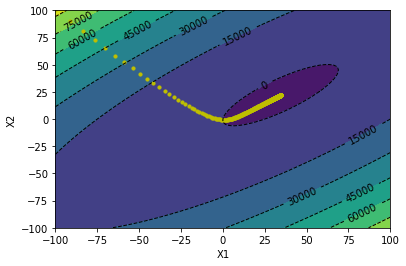

In [16]:
# learning rate 0.01
############################################################
# (0.5 Points)                                             #
############################################################
x1_seq1, x2_seq1 = gradiant_descent(f, initial_point, learning_rates[0], threshold, max_iterations)
draw_points_sequence(f, x1_seq1, x2_seq1)

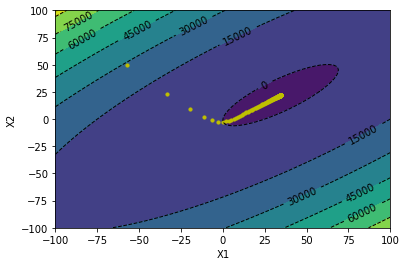

In [17]:
# learning rate 0.05
############################################################
# (0.5 Points)                                             #
############################################################
x1_seq2, x2_seq2 = gradiant_descent(f, initial_point, learning_rates[1], threshold, max_iterations)
draw_points_sequence(f, x1_seq2, x2_seq2)

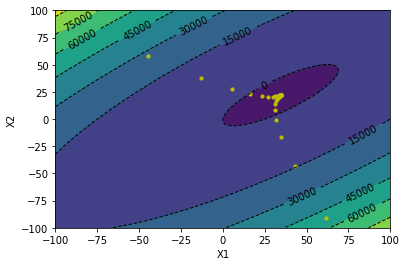

In [18]:
# learning rate 0.19
############################################################
# (0.5 Points)                                             #
############################################################
x1_seq3, x2_seq3 = gradiant_descent(f, initial_point, learning_rates[2], threshold, max_iterations)
draw_points_sequence(f, x1_seq3, x2_seq3)

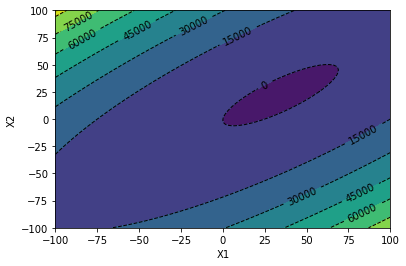

In [19]:
# learning rate 0.4
############################################################
# (0.5 Points)                                             #
############################################################
x1_seq4, x2_seq4 = gradiant_descent(f, initial_point, learning_rates[3], threshold, max_iterations)
draw_points_sequence(f, x1_seq4, x2_seq4)

<div>
    <font size=3>
    explain your result comprehensively from the charts, 
    </font>
</div>

<font color=blue>
    (6 Points) <br/>
As we can see in two first graph, small learning rates makes algorithm to converge to the extremum points. But choosing very small rates will increase the number of steps to converge. On the other hand, if we choose big number for learning rate, the algorithm might not even converge to desireable points. As we can see, ths fault has happend in 3rd and 4th picture.
</font>

# Q2. CSPs (30 Points)

<font size=4>
     Author: Alireza Tajmirriahi
     <br/>
     <font color=red>
     Please run all the cells.
     </font>
</font>
<br/>

As students are preparing for midterm exams and the virtual exam days are gone and forgotten, each department is struggling to select at least one hall out of $N$ halls in the university to hold their exams. But here's the thing:
  - Students from each department aren't really fond of sitting next to students from other departments and must be separated (for example CE students and CS students must not share the same hall for exams).
  - Each department likes certain halls and won't hold their exams in other halls.
  - Sadly, the exit doors in some of the halls are stuck and the hard working staff have provided some routes so that the students from specific halls need to walk through the other hall and exit after the examination. And because they would like to prevent cheating as much as possible, students in such halls cannot be from the same department.
Check out the example below to fully understand the situation.

## Example
Look at this picture carefully.<br>
<img src="Images/CSP_example.png" width="400"/>
  - There are $6$ halls and $3$ departments.
  - The halls which the deparments like are indicated (for example, CE exams can be held only at Hall 1, 4 and 6).
  - Students from Hall 1 should exit using the doors in Hall 2 (Note: they all exit there and won't continue to Hall 3). In this case, EE students cannot be in both Hall 1 and 2 (But of course, it's okay for them to be in Hall 1 and 3).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of departments).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th department (separated by space).
  - In the next line, $E$, the total number of exit constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given (reminder: the direction is important).
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (CE=1, EE=2, ME=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=CE, Hall2=EE , Hall3=ME, Hall4=CE, Hall5=EE, Hall6=EE}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for ME, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells based on the **Rules** section)

In [20]:
# Auxiliary functions
def is_goal(assignment):
    return not -1 in assignment
    
def MRV(values, assignment):
    min_idx = 0
    min_count = float('inf')
    for i in range(len(assignment)):
        if assignment[i] != -1:
            continue
        if len(values[i]) < min_count:
            min_count = len(values[i])
            min_idx = i
    return (min_idx, min_count)

def is_consistent(i, v, assignment, edges):
    for neighbor in edges[i]:
        if v == assignment[neighbor]:
            return False
    return True

In [21]:
def ac_3(values, edges):
    #################################################################
    # (Point: 30% of total score obtained by tests)                 #
    # This function returns false                                   #
    # if an inconsistency is found and true otherwise.              #
    # Feel free to also implement a `revise` function in this cell. #
    #################################################################
    queue = []
    for i in range(len(edges)):
        for neighbor in edges[i]:
            queue.append((i, neighbor))
    while len(queue) != 0:
        e = queue.pop()
        has_changed, new_values = revise(e, values)
        if has_changed:
            values = new_values
            if len(values[e[0]]) == 0:
                return False
            for neighbor in edges[e[0]]:
                if neighbor != e[1]:
                    queue.append((neighbor, e[0]))
    return values

def revise(e, values):
    changed = False
    to_remove = []
    for x in values[e[0]]:
        good = False
        for y in values[e[1]]:
            if x != y:
                good = True
                break
        if not good:
            changed = True
            to_remove.append(x)

    if changed:
        values[e[0]] = [x for x in values[e[0]] if x not in to_remove]

    return (changed, values)

In [22]:
def backtrack(assignment, values, edges):
    #################################################################
    # (Point: 60% of total score obtained by tests)                 #
    # This function returns a solution if there is a complete       #
    # assignment or failure if there is not                         #
    #################################################################
    if is_goal(assignment):
        return assignment
    
    values = ac_3(values, edges)
    if values == False:
        return 'NO'
    
    i, count = MRV(values, assignment)
    if count == 0:
        return 'NO'
    
    for value in values[i]:
        if is_consistent(i, value, assignment, edges):
            assignment[i] = value
            result = backtrack(assignment, values, edges)
            if result != 'NO':
                return result
    assignment[i] = -1
    return 'NO'

def backtracking_search(n, values, edges):
    #################################################################
    #                          (Optional)                           #
    #   Just in case you need an auxiliary function for backtrack   #
    #################################################################
    consistent_values = ac_3(values, edges)
    if consistent_values == False:
        return 'NO'

    assignment = [-1 for _ in range(n)]
    result = backtrack(assignment, consistent_values, edges)
    if result != 'NO':
        result = [x+1 for x in result]
    return result

In [23]:
import Helper_codes.question2 as q2
import time

TIME_LIMIT = 3

tests = q2.get_all_tests(prefix='q2_')
tests_passed = 0
for test in tests:
    n, m, m_next_lines, e, next_e_lines = q2.scan_test_input(test)
    #################################################################
    preferred_values = [[] for _ in range(n)]
    for i in range(m):
        for hall in m_next_lines[i]:
            preferred_values[hall-1].append(i)
    edges = [[] for _ in range(n)]
    for e in next_e_lines:
        edges[e[0]-1].append(e[1]-1)
        edges[e[1]-1].append(e[0]-1)
    #################################################################
    start_time = time.time()
    result = backtracking_search(n, preferred_values, edges)
    total_time = time.time() - start_time
    if q2.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
print(f'Score = {tests_passed / len(tests) * 100}%')

Score = 100.0%


# Q3 (30+5 Points)

<font size=4>
Author: Matina mehdizadeh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In [ ]:
# place for your custom functions for Q3 here

Consider the given 8*8 board game. There are two players in this game and they try to block each other and limit their valid moves by making walls. Their moves are limited to the 8 cells (or less when they are around the edges) beside them and the walls will start to appear only when a player steps into a random generated yellow cell and the wall will continue to be built until the player reaches the next yellow cell. The players start the game at (0,0) and (7,7) and they keep playing untill one of them loses. There are multiple ways for a player to win the match:
- If a player steps into a wall or out of the board, the player loses the match and "invalid move" massege will appear on terminal.
- If the players reach the maximum moves the game finishes and the winner would be chosen based on the maximum valid move they have left plus the number of walls they have made and "No more moves" massege will appear on terminal.
- If the getMove() function does not return any value after 2 seconds, the player loses the match and "Time limit exceeded" massege will appear on terminal.
<img src="Images/Q3.png" style="float: center; margin-left: 250px; margin-top: 50px; width:500px;height:400px;"/>

In this question, the codes for starting the game were provided for you in Helper-codes folder. You are expected to implement the MinimaxPlayer class (which inherit the Player class) with alpha-beta pruning. (25 points)

## Libraries

In [25]:
!pip install tk
!pip install matplotlib
import numpy as np
import random
from Helper_codes.graphics import *
from Helper_codes.question3 import Cell
from Helper_codes.question3 import IntPair
from Helper_codes.question3 import Player
from Helper_codes.question3 import NaivePlayer
from Helper_codes.question3 import Board
from Helper_codes.question3 import Game
import time
import matplotlib as plt
import seaborn as sns

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


**The following implementations are suggestional and you may change them if you desire.
The move_ functions' purpose is to find out if a player, has a valid move on that direction.
the purpose of checkRow and CheckCole are to check if the player's x and y is still in the board.**


In [26]:
class MinimaxPlayer(Player):
    
    __moves = [(0,1), (0,-1), (1,0), (-1,0), (1,1), (1,-1), (-1,1), (-1,-1)]
    __start = None
    __time_exceeded = False
    
    def __init__(self, col, x, y, depth=4):
        super().__init__(col, x, y)
        self.depth = depth
        
    
    def isIn(self, v, length):
        return (v > 0) and (v < length)
    
    def move_possible(self, move, board, player_col):
        x = board.getPlayerX(player_col)
        y = board.getPlayerY(player_col)
        next_x = x + move[0]
        next_y = y + move[1]
        length = board.getSize()
        
        if (not self.isIn(next_x, length)) or (not self.isIn(next_y, length)):
            return False
        if board.getCell(next_x, next_y).getColor() != 0:
            return False
        return True

    def canMove(self, board, player_col):
        for move in self.__moves:
            if self.move_possible(move, board, player_col):
                return True
        return False
    
    def isTerminal(self, board, player_col):
        if board.getNumberOfMoves() == board.maxNumberOfMoves:
            return True
        if not self.canMove(board, player_col):
            return True
        return False

    def minValue(self, board, alpha, beta, depth, player_col):
        ################################################################
        # implement the minValue function (5 points)                   #
        # this function should return an Integer which is the minValue #                                         
        ################################################################
        if time.time() - self.__start > 2:
            self.time_exceeded = True
            return 0
        
        if self.isTerminal(board, player_col) or (depth > self.depth):
            return board.getScore(self.getCol()) - board.getScore(3-self.getCol())
        
        value = float('inf')
        np.random.shuffle(self.__moves)
        for move in self.__moves:
            response, new_board = self.result(move, board, player_col)
            if response != 0:
                continue
            value = min(value, self.maxValue(new_board, alpha, beta, depth+1, 3-player_col))
            if value <= alpha:
                return value
            beta = min(beta, value)
        return value
    
    def maxValue(self, board, alpha, beta, depth, player_col):
        ################################################################
        # implement the manValue function (5 points)                   #
        # this function should return an Integer which is the manValue #                                         
        ################################################################
        if time.time() - self.__start > 2:
            self.time_exceeded = True
            return 0
        
        if self.isTerminal(board, player_col) or (depth > self.depth):
            return board.getScore(self.getCol()) - board.getScore(3-self.getCol())
        
        value = float('-inf')
        np.random.shuffle(self.__moves)
        for move in self.__moves:
            response, new_board = self.result(move, board, player_col)
            if response != 0:
                continue
            value = max(value, self.minValue(new_board, alpha, beta, depth+1, 3-player_col))
            if value >= beta:
                return value
            alpha = max(alpha, value)
        return value
    
    def result(self, move, board, player_col):
        new_board = Board(board)
        current_x = board.getPlayerX(player_col)
        current_y = board.getPlayerY(player_col)
        next_place = IntPair(current_x + move[0], current_y + move[1])
        
        response = new_board.move(next_place, player_col)
        return (response, new_board)
        
    def getMove(self, board):
        ################################################################
        # implement a function that returns an Inpair for player's-    #
        # next x and y. Implementation of x and y should be in a way-  #
        # that let the players choose any of the 8 cells around them   #
        # (unlike the NaivePlayer which can go only in 4 direction)    #                                          
        # pay attention that this IntPair should be calculated using   #
        # alpha beta pruning Otherwise, you will not receive the full  #
        # score (15 points)                                            #
        ################################################################
        alpha = float('-inf')
        beta = float('inf')
        next = IntPair(-20, -20)
        self.__start = time.time()
        self.__time_exceeded = False

        if (board.getNumberOfMoves() == board.maxNumberOfMoves):
            return IntPair(-20, -20)
        
        if not (self.canMove(board, self.getCol())):
            return IntPair(-10, -10)
        
        best_val = float('-inf')
        current_x = board.getPlayerX(self.getCol())
        current_y = board.getPlayerY(self.getCol())
        np.random.shuffle(self.__moves)
        for move in self.__moves:
            response, new_board = self.result(move, board, self.getCol())
            if response != 0:
                continue
            new_val = self.minValue(new_board, alpha, beta, 1, 3-self.getCol())
            if new_val > best_val:
                next = IntPair(current_x + move[0], current_y + move[1])
        
        if self.__time_exceeded:
            return IntPair(-10, -10)
        return next

If you run the game once (numberOfMatches = 1) the game window will open and you would be able to observe the players behaviour and the reason why the winner has won, will appear on terminal.
If you run the game for more than one match (numberOfMatches > 1) the graphic window and the comments on terminal would not show up. This is for the time you finish implementing the MinimaxPlayer class and you want to verify the functionality of your code; also, for next part of the question, in which you should plot the scores for the first player.

In [ ]:
################################################################
# p1 must be replace with minimaxPlayer                        #
################################################################
p1 = MinimaxPlayer(1, 0, 0, 4)
p2 = NaivePlayer(2, 7, 7)
g = Game(p1, p2)
numberOfMatches = 1
score1, score2 = g.start(numberOfMatches)
print(score1/numberOfMatches)

In this section, you need to run the game code multiple times and each time with the same numberOfMatches (this should be a large number so your answer be more reliable) once for Naive player and once for Minimax. compare these two plots in terms of shape and the main elements of the distribution. (5 points)

In [ ]:
################################################################
# when player1 is NaivePlayer (2.5 point)                      #
################################################################

# this actullay was taking tooooooooo long, so I gave up on it, :')

scores_1 = []
for _ in range(10):
    p1 = MinimaxPlayer(1, 0, 0, 4)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 3
    score1, score2 = g.start(numberOfMatches)
    scores_1.append(score1)

sns.displot(scores_1, kind='kde')

In [ ]:
################################################################
# when player1 is MinimaxPlayer (2.5 point)                    #
################################################################
scores_2 = []
for _ in range(10):
    p1 = MinimaxPlayer(1, 0, 0, 4)
    p2 = MinimaxPlayer(2, 7, 7, 4)
    g = Game(p1, p2)
    numberOfMatches = 3
    score1, score2 = g.start(numberOfMatches)
    scores_2.append(score1)

sns.displot(scores_2, kind='kde')

In this section you should change the game settings for different depths and plot the number of wins in fix number of matches for these depths. Also, you should let two minimax players with diffrent depths play againts eachother and report your observation.(5 points)

In [ ]:
################################################################
# plot the number of wins for diffrent depths (2.5 point)      #
################################################################
scores_3 = []
depths = [2, 4, 6, 8, 10]
for depth in depths:
    p1 = MinimaxPlayer(1, 0, 0, depth)
    p2 = NaivePlayer(2, 7, 7)
    g = Game(p1, p2)
    numberOfMatches = 4
    score1, score2 = g.start(numberOfMatches)
    scores_3.append(score1)

plt.plot(x=depth, y=scores_3)

In [ ]:
################################################################
# start the match for two minimax players (2.5 point)          #
################################################################
scores_4 = []
depths = [2, 4, 6, 8, 10]
for depth in depths:
    p1 = MinimaxPlayer(1, 0, 0, depth)
    p2 = MinimaxPlayer(2, 7, 7, depth)
    g = Game(p1, p2)
    numberOfMatches = 4
    score1, score2 = g.start(numberOfMatches)
    scores_4.append(score1)

plt.plot(x=depth, y=scores_4)